Saving Invistico_Airline (1).csv to Invistico_Airline (1).csv


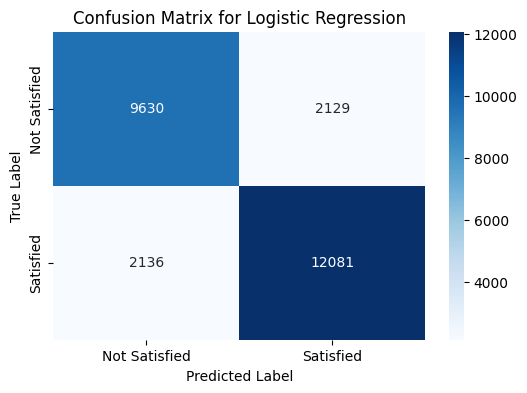

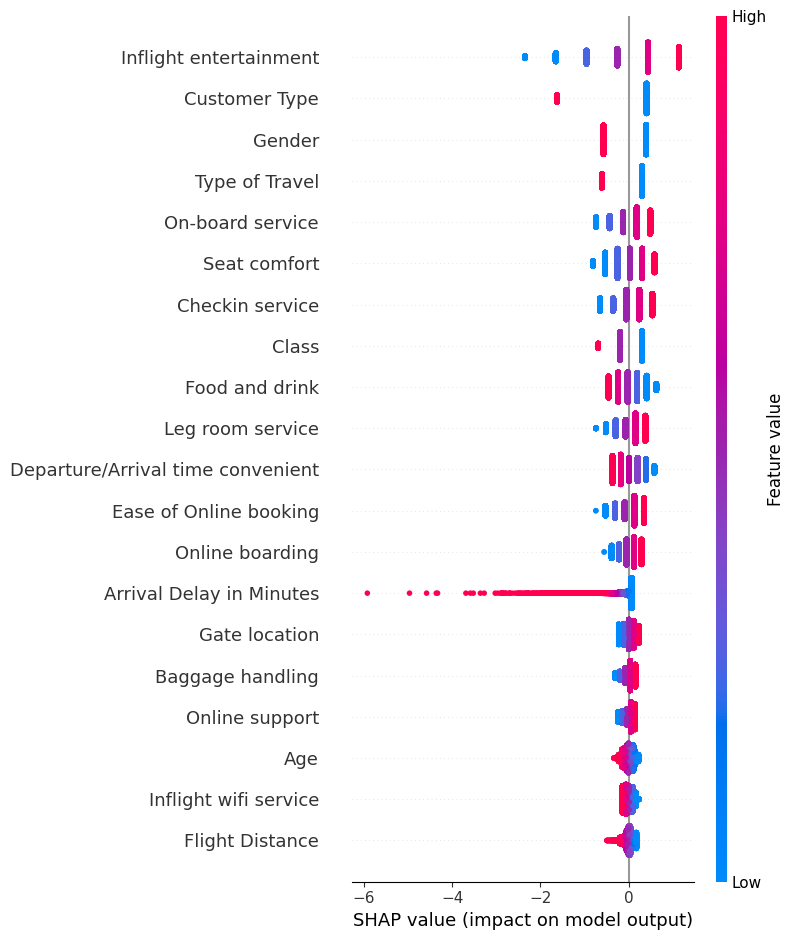

<ipython-input-1-815e0aa27f5f>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette="viridis")


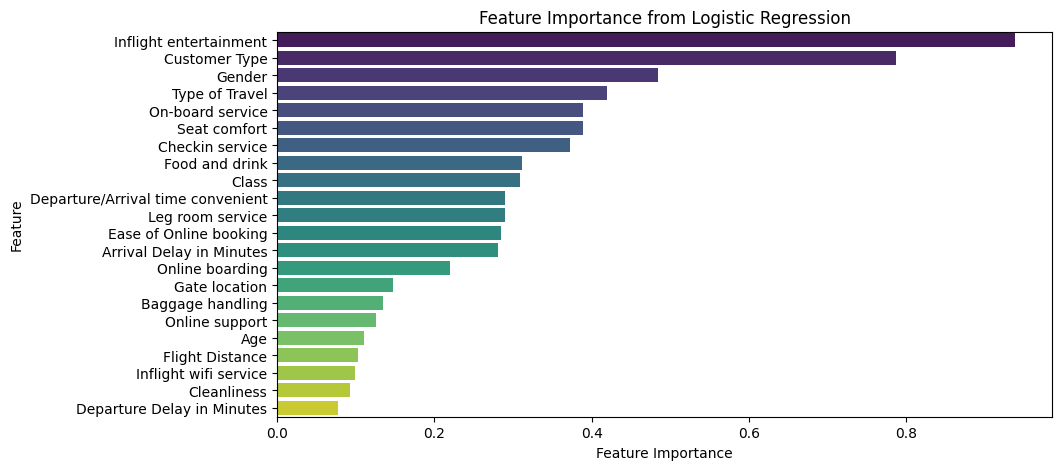

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82     11759
           1       0.85      0.85      0.85     14217

    accuracy                           0.84     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.84      0.84      0.84     25976



In [ ]:
# Install required libraries (if not installed)
!pip install shap seaborn scikit-learn matplotlib pandas

# Import necessary libraries
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Upload dataset
from google.colab import files
uploaded = files.upload()

# Read dataset (assuming it's a CSV file)
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Encode categorical variables
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Handle missing values
df.fillna(df.median(), inplace=True)

# Define features (X) and target (y)
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# SHAP Analysis
explainer = shap.Explainer(log_reg, X_train)
shap_values = explainer(X_test)

# Generate SHAP Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=df.drop(columns=['satisfaction']).columns)

# Feature Importance from Logistic Regression
importance = np.abs(log_reg.coef_).flatten()
feature_importance = pd.DataFrame({'Feature': df.drop(columns=['satisfaction']).columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Logistic Regression")
plt.show()

# Generate Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
